In [1]:
#Importing the libraries
from nsepy import get_history as stock_hist
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
symbol='SBIN'

In [3]:
#Setting start and end dates and fetching the historical data
start = dt.datetime(2015,1,1)
end = dt.datetime(2020,12,31)
stk_data = stock_hist(symbol=symbol,start=start,end=end)

In [4]:
stk_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [5]:
stk_data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-12-24,SBIN,EQ,263.00,265.00,268.85,264.65,266.85,266.85,267.02,28585509,7.632821e+14,167695,6820426,0.2386
2020-12-28,SBIN,EQ,266.85,268.75,276.00,268.00,275.75,275.20,272.23,36870242,1.003737e+15,203967,9995425,0.2711
2020-12-29,SBIN,EQ,275.20,276.30,279.90,274.70,277.75,277.90,277.56,45032526,1.249925e+15,237470,12390520,0.2751
2020-12-30,SBIN,EQ,277.90,278.00,278.70,272.50,275.50,276.90,275.47,30971894,8.531681e+14,163939,6530230,0.2108
2020-12-31,SBIN,EQ,276.90,275.00,277.25,272.60,274.40,274.95,275.29,29467966,8.112161e+14,183603,8782576,0.2980


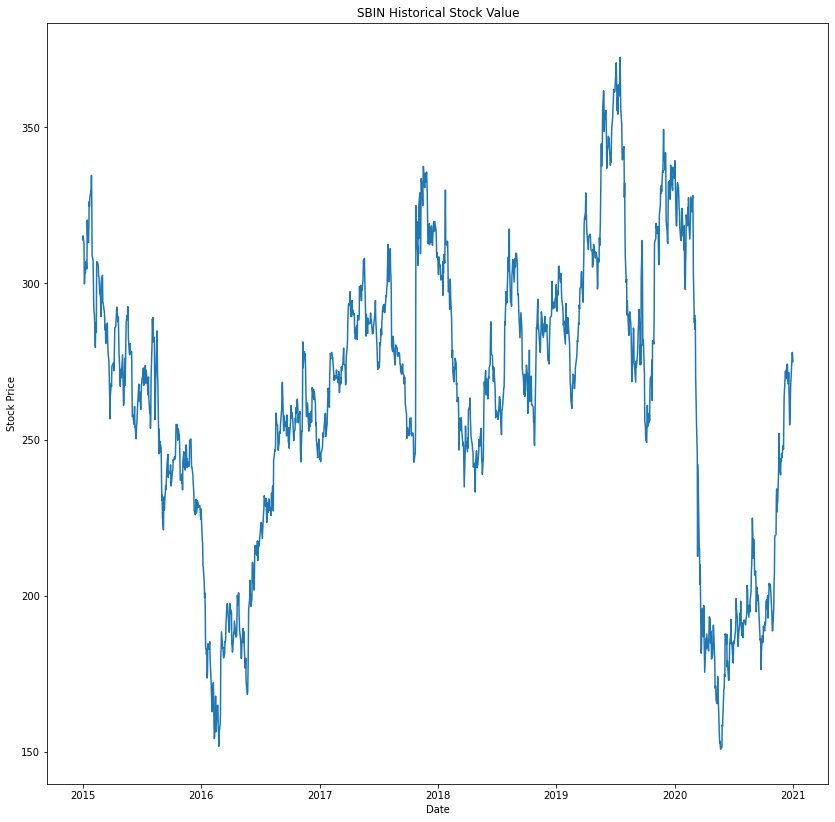

In [6]:
#Visualizing the fetched data
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title(f'{symbol} Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [7]:
#Data Preprocessing
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']


#Handling null values
data2.fillna(method='ffill', inplace=True)

train_set = data2.iloc[:, 1:2].values

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, len(train_set)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
X_train.shape

(1426, 60, 1)

In [9]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

2022-01-05 20:25:45.975625: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
45/45 [==============================] - 11s 94ms/step - loss: 0.0382
Epoch 2/15
45/45 [==============================] - 4s 100ms/step - loss: 0.0126
Epoch 3/15
45/45 [==============================] - 5s 114ms/step - loss: 0.0099
Epoch 4/15
45/45 [==============================] - 4s 91ms/step - loss: 0.0098
Epoch 5/15
45/45 [==============================] - 4s 92ms/step - loss: 0.0090
Epoch 6/15
45/45 [==============================] - 4s 91ms/step - loss: 0.0074
Epoch 7/15
45/45 [==============================] - 4s 90ms/step - loss: 0.0069
Epoch 8/15
45/45 [==============================] - 4s 90ms/step - loss: 0.0071
Epoch 9/15
45/45 [==============================] - 4s 90ms/step - loss: 0.0064
Epoch 10/15
45/45 [==============================] - 4s 90ms/step - loss: 0.0062
Epoch 11/15
45/45 [==============================] - 4s 91ms/step - loss: 0.0056
Epoch 12/15
45/45 [==============================] - 5s 117ms/step - loss: 0.0053
Epoch 13/15
45/45 [==============

In [11]:
testdataframe= stock_hist(symbol=symbol,start=dt.datetime(2021,1,1),end=dt.datetime(2022,1,5))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']

#Handling null values
testdata.fillna(method='ffill', inplace=True)

real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

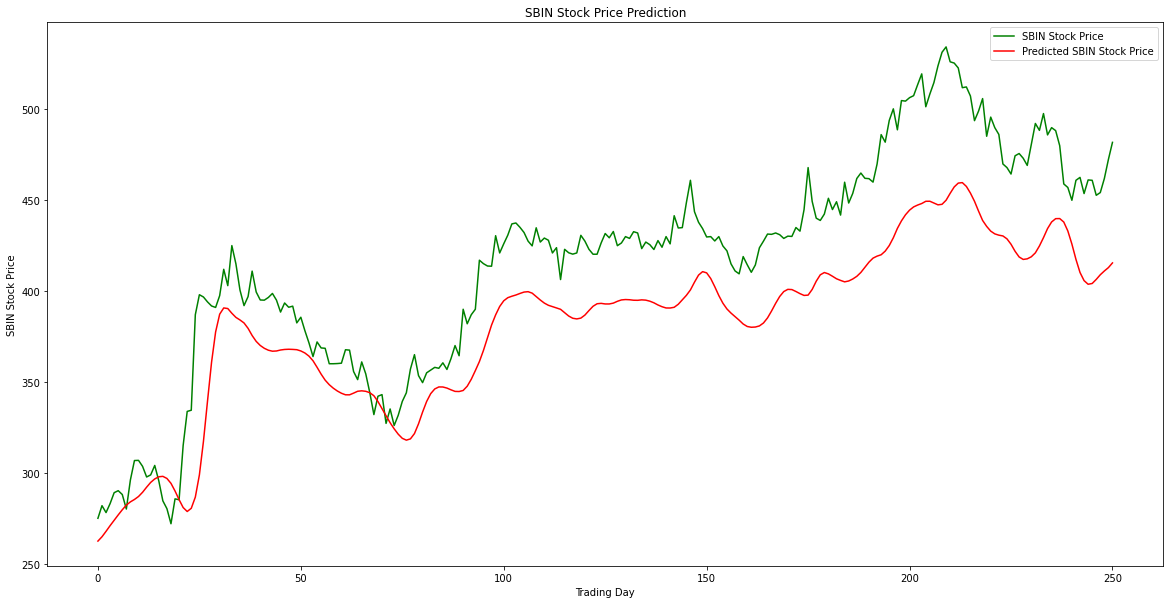

In [13]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = f'{symbol} Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = f'Predicted {symbol} Stock Price')
plt.title(f'{symbol} Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel(f'{symbol} Stock Price')
plt.legend()
plt.show()